<a href="https://colab.research.google.com/github/robertluera/rl-app-brewery-data-science-course/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Imports and Packages

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff

%matplotlib inline

# Example 1 - a simple cost function
## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
  return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

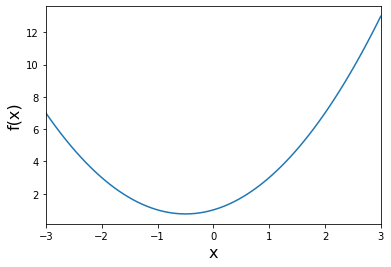

In [4]:
# Plot
plt.xlim(-3,3)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show()

##Slope and Derivatives

In [5]:
def df(x):
  return 2*x + 1

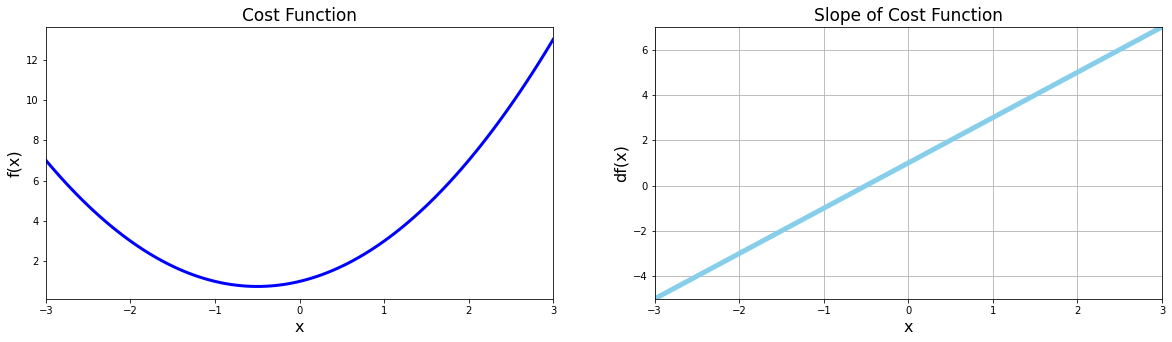

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[20,5])

# 1st chart: Cost Function
plt.subplot(1,2,1) # places this first plot in row 1 of 2 columns at index 1
plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2nd chart: Derivative
plt.subplot(1,2,2) #places second plot at row 1 of 2 columns at index 2
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,7)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()


## Python Loops and Gradient Descent

In [7]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(300):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier*gradient
  # think about this ^^ equation, makes sense to find the minimum of a function

  x_list.append(new_x)
  slope_list.append(df(new_x))

  step_size = abs(new_x - previous_x)
  if step_size < precision:
    print('Loop ran this many times:', n)
    break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) at this point:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) at this point: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


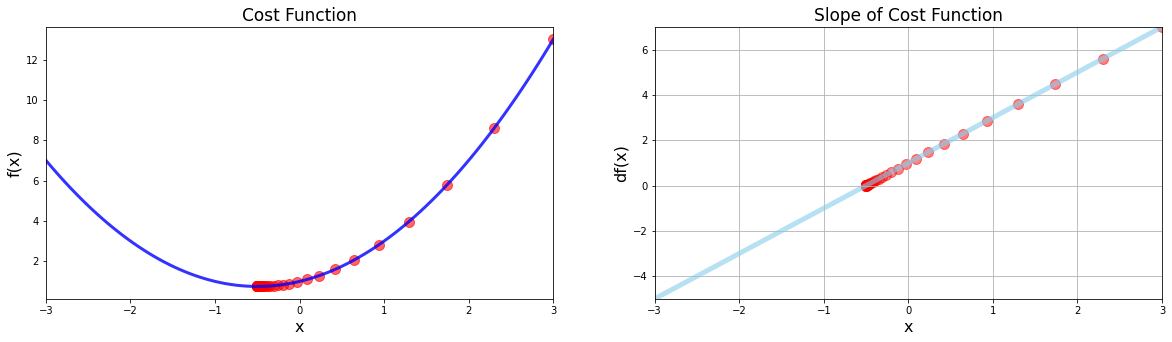

In [8]:
# Superimpose gradient descent calculations on plot

plt.figure(figsize=[20,5])

# 1st chart: Cost Function
plt.subplot(1,2,1) # places this first plot in row 1 of 2 columns at index 1
plt.title('Cost Function', fontsize=17)
plt.xlim(-3,3)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', alpha=0.6, s=100)

# 2nd chart: Derivative
plt.subplot(1,2,2) #places second plot at row 1 of 2 columns at index 2
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-3,3)
plt.ylim(-5,7)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

plt.show()


## Example 2: Multiple Minimum vs. Initial Guess and Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x


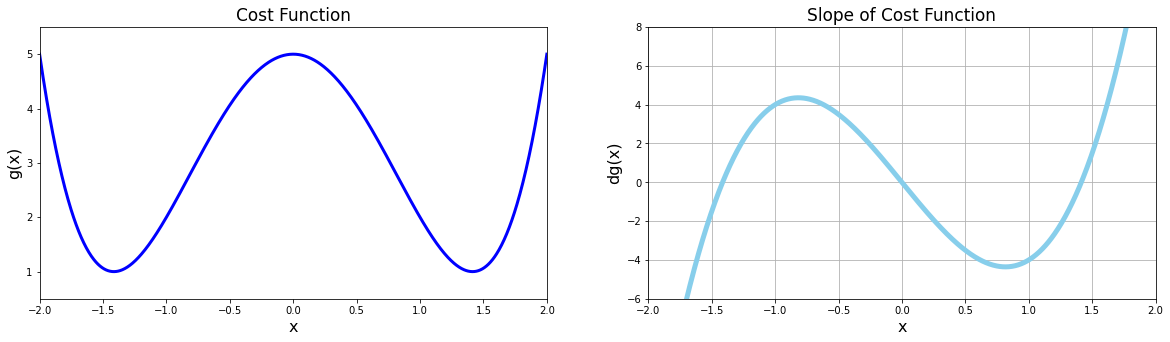

In [10]:
# Plot function and derivative side by side

plt.figure(figsize=[20,5])

# 1st chart: Cost Function
plt.subplot(1,2,1) # places this first plot in row 1 of 2 columns at index 1
plt.title('Cost Function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# 2nd chart: Derivative
plt.subplot(1,2,2) #places second plot at row 1 of 2 columns at index 2
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()


## Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier*gradient
    # think about this ^^ equation, makes sense to find the minimum of a function

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    step_size = abs(new_x - previous_x)
    if step_size < precision:
      break
  
  return new_x, x_list, slope_list


In [12]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('local min:', local_min)
print('number of steps:', len(list_x))

local min: 1.4122375085019094
number of steps: 23


In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.02, precision=.001)
print('local min:', local_min)
print('number of steps:', len(list_x))

local min: -1.4122375085019094
number of steps: 23


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('local min:', local_min)
print('number of steps:', len(list_x))

local min: -1.4120887490901561
number of steps: 34


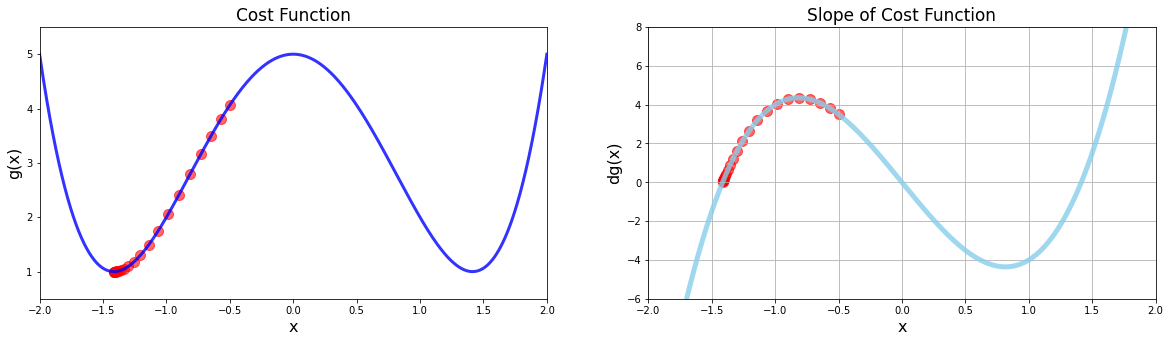

In [15]:
# Calling gradient_descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20,5])

# 1st chart: Cost Function
plt.subplot(1, 2, 1) # places this first plot in row 1 of 2 columns at index 1
plt.title('Cost Function', fontsize=17)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd chart: Derivative
plt.subplot(1, 2, 2) #places second plot at row 1 of 2 columns at index 2
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()


# Example 3: Divergence, Overflow, and Python Tuples

## $$ h(x) = x^5 - 2x^4 +2$$

In [16]:
# Make Data

x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3


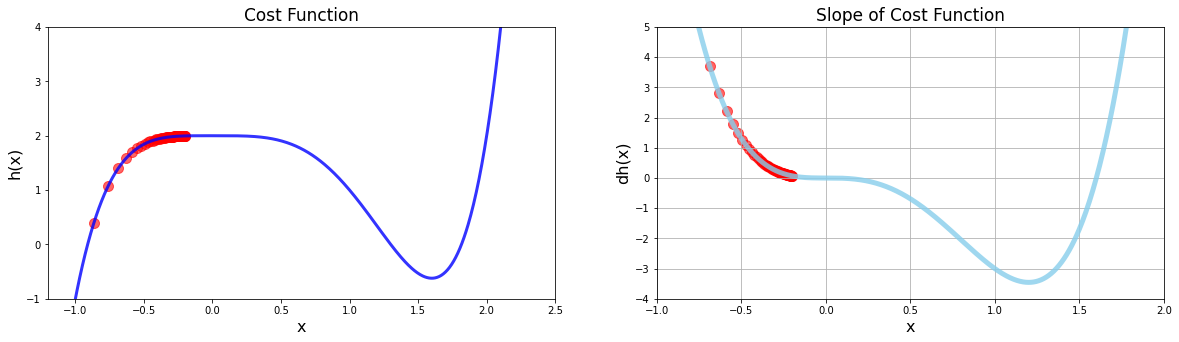

local min occurs at: -1.8398461123332792e+24
cost of local min: -2.1081790694225687e+121
number of steps: 72


In [17]:
# Calling gradient_descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess=-0.2, max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20,5])

# 1st chart: Cost Function
plt.subplot(1, 2, 1) # places this first plot in row 1 of 2 columns at index 1
plt.title('Cost Function', fontsize=17)
plt.xlim(-1.2,2.5)
plt.ylim(-1, 4)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2nd chart: Derivative
plt.subplot(1, 2, 2) #places second plot at row 1 of 2 columns at index 2
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

print('local min occurs at:', local_min)
print('cost of local min:', h(local_min))
print('number of steps:', len(list_x))


# The Learning Rate


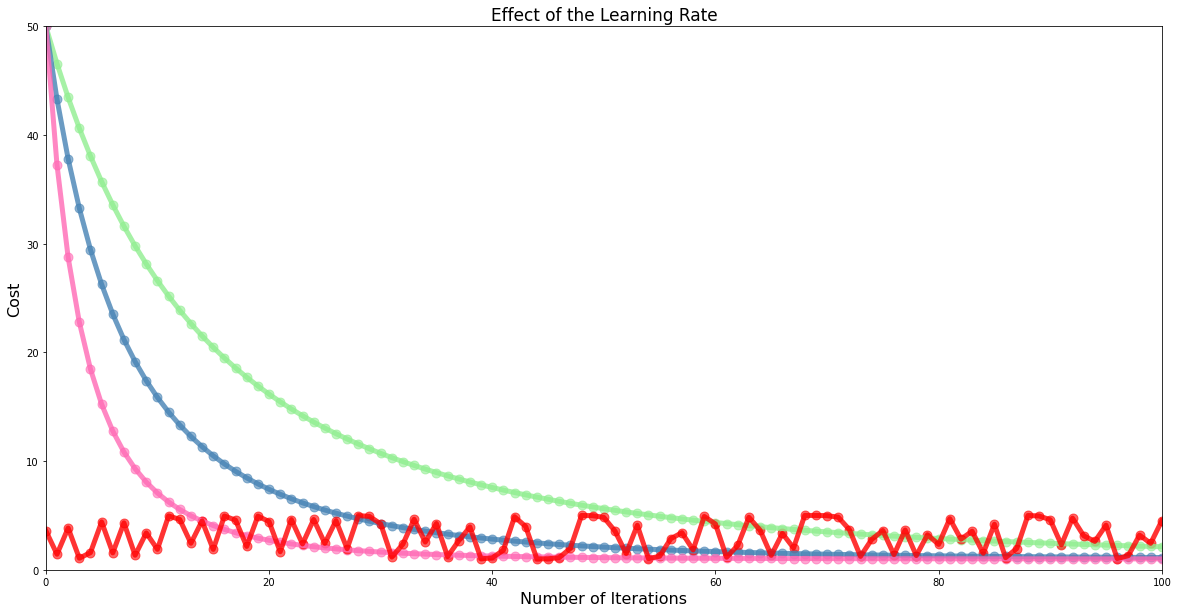

In [18]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20,10])

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlim(0, n)
plt.ylim(0, 50)
plt.xlabel('Number of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) y axis data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) x axis data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))


# plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(low_values), s=80, color='lightgreen', alpha=0.6)

# plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(mid_values), s=80, color='steelblue', alpha=0.6)

# plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(high_values), s=80, color='hotpink', alpha=0.6)

# plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), s=80, color='red', alpha=0.6)

plt.show()

# Example 4: Data Vizualization with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2}+1}$$

Minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$


In [19]:
def f(x,y):
  r=3**(-x**2 - y**2)
  return 1 / (r + 1)

In [20]:
# make our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('shape of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print('array after meshgrid:', x_4.shape)

shape of x array (200,)
array after meshgrid: (200, 200)


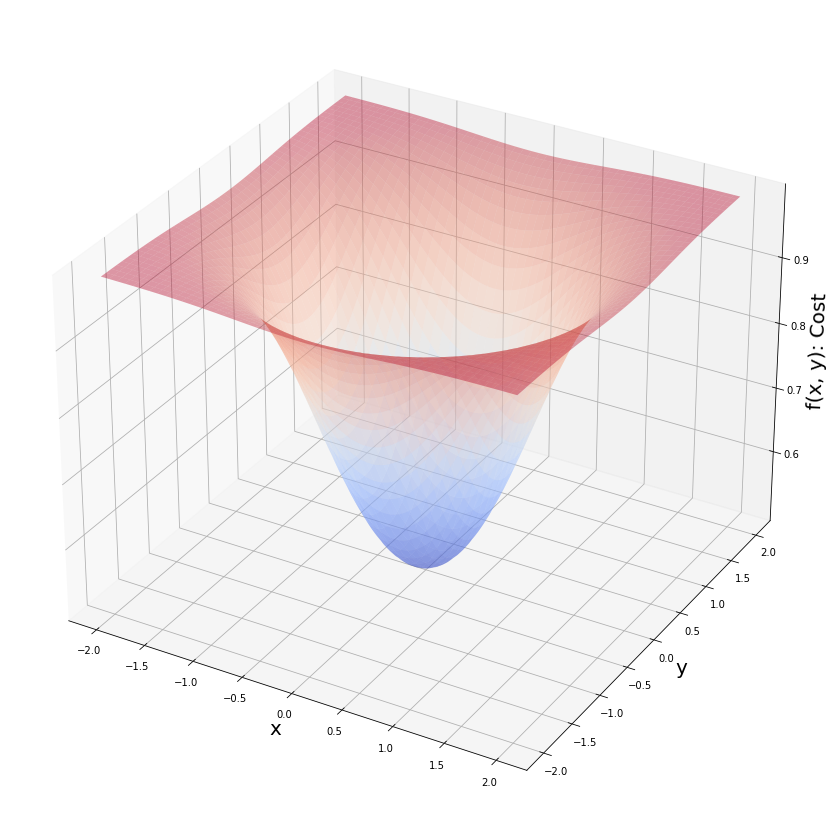

In [23]:
# generating 3D plot
fig = plt.figure(figsize=[20,15])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y): Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()


## Partial Derivatives and Symbolic Computation

In [32]:
a, b =symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8, y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial dervivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582
Value of partial dervivative wrt x:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [35]:
# setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0]) # initial guess

for n in range(max_iter):
  gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
  gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
  gradients = np.array([gradient_x, gradient_y])
  params = params - multiplier * gradients

# results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of : ', params[0])
print('Minimum occurs at y value of : ', params[1])
print('The cost is: ', f(params[0], params[1]))


Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of :  3.45838599885832e-11
Minimum occurs at y value of :  1.92132555492129e-11
The cost is:  0.500000000000000
